# Lirbaries

In [1]:
import numpy as np
import pandas as pd
import sys
sys.path.append("../src/")
from xgboost_tuning_with_hyperopt import *

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 

# Load data

In [2]:
data = load_breast_cancer()
print(data.keys())
y = pd.Series(data["target"])
X = pd.DataFrame(data["data"], columns=data["feature_names"])
X.head()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# Train a first model

## Split in train, valid, test

In [3]:
X_train, X_val, y_train, y_val = train_test_split(X,y)
X_train, X_test, y_train, y_test = train_test_split(X_train,y_train)

## Tune xgboost classfier with hyperopt

In [4]:
xgb_classifier = XGBClassifierTuning(X_train, y_train, X_val, y_val)

100%|██████████| 10/10 [00:00<00:00, 13.54it/s, best loss: 0.006542763272024743]


## Classification report

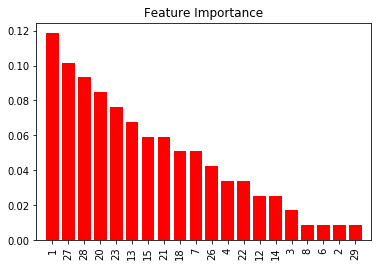

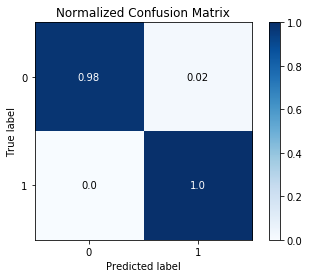

Classification report
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        40
           1       0.99      1.00      0.99        67

   micro avg       0.99      0.99      0.99       107
   macro avg       0.99      0.99      0.99       107
weighted avg       0.99      0.99      0.99       107



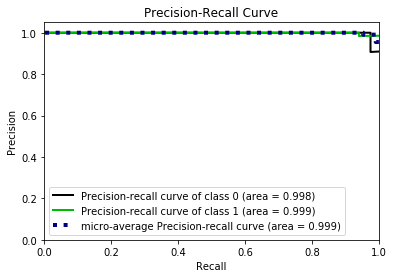

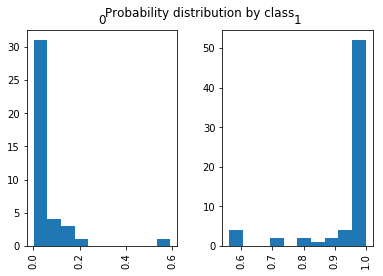

In [5]:
xgb_classifier.report(X_test, y_test)

# Same process with one function

In [6]:
X_train, y_train, X_val, y_val, X_test, y_test, xgb_classifier = make_model(
    X, y)

100%|██████████| 10/10 [00:00<00:00, 18.53it/s, best loss: 0.004963926092700688]


# Repeat process to get a benchmark on a dataset

In [7]:
benchmark_metrics = xgboost_scores(X, y, n_splits=10)

  0%|          | 0/10 [00:00<?, ?it/s]


100%|██████████| 10/10 [00:00<00:00, 17.35it/s, best loss: 0.003671141397337596]


 10%|█         | 1/10 [00:00<00:06,  1.44it/s]


100%|██████████| 10/10 [00:00<00:00, 12.81it/s, best loss: 0.0]


 20%|██        | 2/10 [00:01<00:05,  1.34it/s]


100%|██████████| 10/10 [00:00<00:00, 18.94it/s, best loss: 0.004605502143294471]


 30%|███       | 3/10 [00:02<00:05,  1.40it/s]


100%|██████████| 10/10 [00:00<00:00, 14.96it/s, best loss: 0.0024999577870656875]


 40%|████      | 4/10 [00:03<00:04,  1.35it/s]


100%|██████████| 10/10 [00:00<00:00, 16.16it/s, best loss: 0.0023079191138035693]

 50%|█████     | 5/10 [00:03<00:03,  1.37it/s]


100%|██████████| 10/10 [00:00<00:00, 20.93it/s, best loss: 0.008078170253316364]

 60%|██████    | 6/10 [00:04<00:02,  1.47it/s]


100%|██████████| 10/10 [00:00<00:00, 15.65it/s, best loss: 0.012079494511133992]


 70%|███████   | 7/10 [00:05<00:02,  1.42it/s]


100%|██████████| 10/10 [00:00<00:00, 23.54it/s, best loss: 0.003527574923899768]

 80%|████████  | 8/10 [00:05<00:01,  1.52it/s]


100%|██████████| 10/10 [00:00<00:00, 18.74it/s, best loss: 0.002133185489203049]

 90%|█████████ | 9/10 [00:06<00:00,  1.57it/s]


100%|██████████| 10/10 [00:00<00:00, 13.29it/s, best loss: 0.002732264965315201]


100%|██████████| 10/10 [00:07<00:00,  1.43it/s]


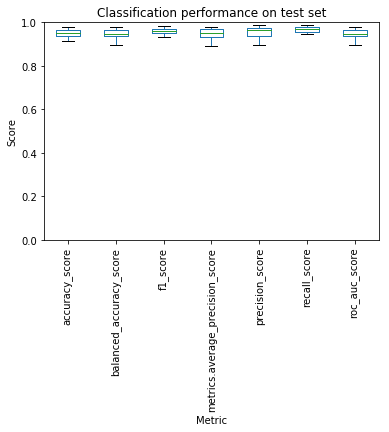

In [8]:
pd.DataFrame(benchmark_metrics).plot.box()
plt.xticks(rotation=90)
plt.ylim((0,1))
plt.xlabel("Metric")
plt.ylabel("Score")
plt.title("Classification performance on test set")
plt.show()